# Employee Analysis using Employee Database from SQL

## Using SQLAlechemy analyze the data from SQL

In [3]:
# import sqlachemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from config import key

In [4]:
#set up connection to SQL database
engine = create_engine(f'postgresql://{key}localhost:5432/employee_DB')
connection = engine.connect()

In [5]:
# Import Matplot lib and pandas
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Table Names

In [6]:
# get table names for database
inspector = inspect(engine)
table_names = inspector.get_table_names()
table_names

['titles',
 'employees',
 'departments',
 'dept_manager',
 'dept_employee',
 'salaries']

### Column Names for each table

In [7]:
# get column names and data types for each table
for t in table_names:
    columns = inspector.get_columns(t)
    print("...")
    print(f"Table: {t}")
    for c in columns:
        print(c['name'], c["type"])

...
Table: titles
title_id VARCHAR(5)
title VARCHAR(20)
...
Table: employees
employee_number INTEGER
title_id VARCHAR(5)
birth_date DATE
first_name VARCHAR(30)
last_name VARCHAR(30)
sex VARCHAR(1)
hire_date DATE
...
Table: departments
dept_number VARCHAR(4)
dept_name VARCHAR(20)
...
Table: dept_manager
dept_number VARCHAR(5)
employee_number INTEGER
...
Table: dept_employee
employee_number INTEGER
dept_number VARCHAR(5)
...
Table: salaries
employee_number INTEGER
salary INTEGER


### DataFrames for 3 Tables

#### Titles Table Dataframe

In [20]:
# make data frame for titles table
Titles = pd.read_sql("SELECT * FROM titles", connection)
Titles

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


#### Employees Table Dataframe

In [19]:
# make data frame for employees table
Employees = pd.read_sql("SELECT * FROM employees", connection)
Employees

,employee_number,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


#### Salary Table DataFrame

In [18]:
#make data frame for salaries table
Salary = pd.read_sql("SELECT * FROM salaries", connection)
Salary

,employee_number,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


#### Checking for null/missing values

In [21]:
Titles.count()

title_id    7
title       7
dtype: int64

In [22]:
Employees.count()

employee_number    300024
title_id           300024
birth_date         300024
first_name         300024
last_name          300024
sex                300024
hire_date          300024
dtype: int64

In [23]:
Salary.count()

employee_number    300024
salary             300024
dtype: int64

### Histogram

The following figure is a visualization using a histogram for the common salary ranges for employees.

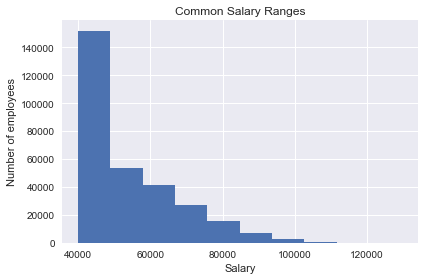

In [14]:
# histogram of most common salary ranges for employees
x = Salary["salary"]
fig, ax = plt.subplots()
ax.hist(x)
ax.set_xlabel("Salary")
ax.set_ylabel("Number of employees")
ax.set_title("Common Salary Ranges")
fig.tight_layout()
matplotlib.pyplot.savefig("Common_Salary_Ranges")

### Average Salary by title

In order to get the average salary by title, the three dataframes must be combined. First, the salary and employees dataframes will be merged on their common column of employee_number. Then a groupby function can be used to put the title_ids into separate groups. Then the average is taken for each group. A dataframe is made from that information which then can be combined with the Titles dataframe to get the actual names for each Title and not just the id number. Finally, a graph is made of this information. 

In [12]:
#merge employees and salary by employee_number
emp_sal_df = pd.merge(Employees, Salary, on="employee_number")
emp_sal_df

,employee_number,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,69696
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,75355
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,61886
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,62772


In [13]:
#group by title_id
grouped_sal = emp_sal_df.groupby(['title_id'])
grouped_sal.count().head(10)

,employee_number,birth_date,first_name,last_name,sex,hire_date,salary
title_id,,,,,,,
e0001,5835,5835,5835,5835,5835,5835,5835
e0002,47303,47303,47303,47303,47303,47303,47303
e0003,97747,97747,97747,97747,97747,97747,97747
e0004,15148,15148,15148,15148,15148,15148,15148
m0001,24,24,24,24,24,24,24
s0001,107384,107384,107384,107384,107384,107384,107384
s0002,26583,26583,26583,26583,26583,26583,26583


In [14]:
#average the salary for each group title_id and rounded 
salary_average = round(grouped_sal["salary"].mean(),2)
salary_average

title_id
e0001    48564.43
e0002    48535.34
e0003    48506.80
e0004    48582.90
m0001    51531.04
s0001    58465.38
s0002    58550.17
Name: salary, dtype: float64

In [15]:
#make that a new data frame
avg_salary_df = pd.DataFrame({"Avg Salary":salary_average})
avg_salary_df

,Avg Salary
title_id,
e0001,48564.43
e0002,48535.34
e0003,48506.80
e0004,48582.90
m0001,51531.04
s0001,58465.38
s0002,58550.17


In [16]:
# merge new average salary dateframe with salary titles
salary_title = pd.merge(avg_salary_df, Titles, on="title_id")
salary_title

,title_id,Avg Salary,title
0,e0001,48564.43,Assistant Engineer
1,e0002,48535.34,Engineer
2,e0003,48506.80,Senior Engineer
3,e0004,48582.90,Technique Leader
4,m0001,51531.04,Manager
5,s0001,58465.38,Staff
6,s0002,58550.17,Senior Staff


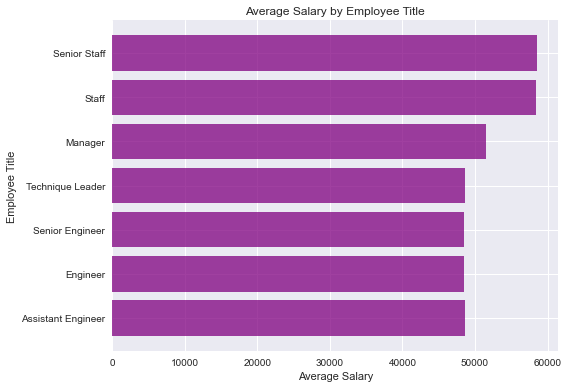

In [47]:
#plot bar graph for average salary by employee title
title = salary_title["title"]
salary = salary_title["Avg Salary"]
fig, ax = plt.subplots()
ax.set_title("Average Salary by Employee Title")
ax.set_xlabel("Average Salary")
ax.set_ylabel("Employee Title")
ax.barh(title, salary, facecolor="purple", alpha=0.75, align="center")
fig.tight_layout()
matplotlib.pyplot.savefig("Average_Salary_Title")

### Finding Employee with ID number 499942

In [20]:
#find employee with ID number 499942
emp_499942 = Employees.loc[Employees["employee_number"]==499942]
emp_499942

,employee_number,employee_title_id,birth_date,first_name,last_name,sex,hire_date
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
